In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from shapely.geometry import Point
import matplotlib.pyplot as plt
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.plot import plotting_extent
from natsort import natsorted
import earthpy.spatial as es
import pandas as pd
import geopandas
import rasterio
import pycrs
import os

file_dir = ('/Users/maddie/Projects/CPSC_597/data/data_raw/')
file_dir2 = ('/Users/maddie/Projects/CPSC_597/data/')

In [2]:
list_envirem_files=[]
names_envirem=[]

#add files to these lists
for root, dirs, files in os.walk(file_dir+"/bio_oracle/"):
    for file in files:
        if file.endswith('.tif'):
            list_envirem_files.append(file_dir+"/bio_oracle/"+file)
            name=file.replace(".tif","")
            names_envirem.append(name)
            names_envirem=natsorted(names_envirem,key=lambda y: y.lower())
            
   

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': -1.7e+308, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


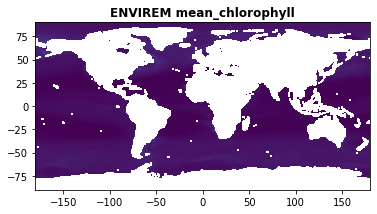

<AxesSubplot: title={'center': 'ENVIREM mean_chlorophyll'}>

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': -1.7e+308, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


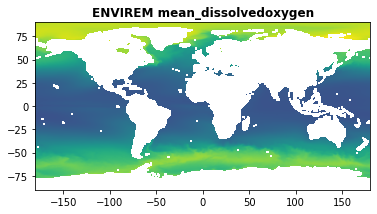

<AxesSubplot: title={'center': 'ENVIREM mean_dissolvedoxygen'}>

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': -1.7e+308, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


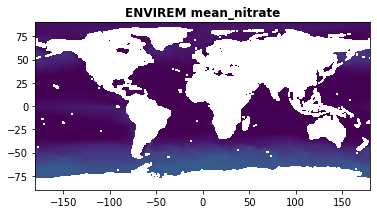

<AxesSubplot: title={'center': 'ENVIREM mean_nitrate'}>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


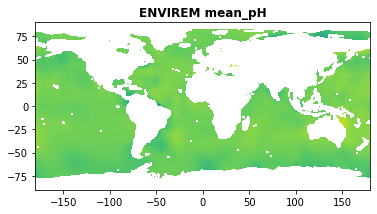

<AxesSubplot: title={'center': 'ENVIREM mean_pH'}>

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': -1.7e+308, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


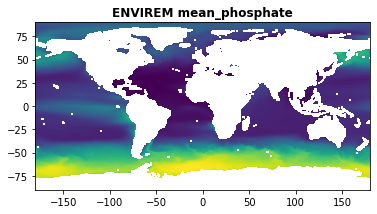

<AxesSubplot: title={'center': 'ENVIREM mean_phosphate'}>

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': -1.7e+308, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


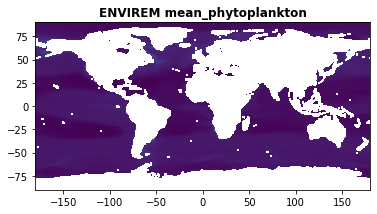

<AxesSubplot: title={'center': 'ENVIREM mean_phytoplankton'}>

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': -1.7e+308, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


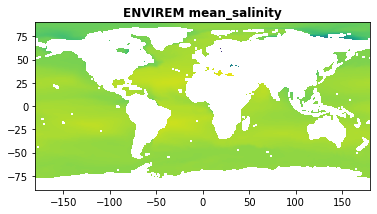

<AxesSubplot: title={'center': 'ENVIREM mean_salinity'}>

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': -1.7e+308, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


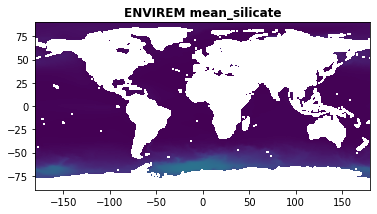

<AxesSubplot: title={'center': 'ENVIREM mean_silicate'}>

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': -1.7e+308, 'width': 4320, 'height': 2160, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.08333333333333333, 0.0, -180.0,
       0.0, -0.08333333333333333, 90.0)}


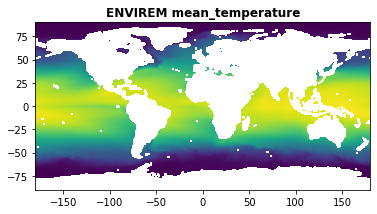

<AxesSubplot: title={'center': 'ENVIREM mean_temperature'}>

In [3]:
for name in names_envirem:
    raster=rasterio.open(file_dir+"/bio_oracle/"+name+".tif")
    print(raster.meta) #inspect meta information
    show(raster,title="ENVIREM %s"%name)
    

In [4]:
list_envirem_bioclim_files=[]
for item in list_envirem_files:
    list_envirem_bioclim_files.append(item)

names_envirem_bioclim=[]
for item in names_envirem:
    names_envirem_bioclim.append(item)


with open(file_dir+'/bio_oracle/variable_list.txt', 'w') as f:
    for item in names_envirem_bioclim:
        f.write("%s\n" % item)      
        
es.stack(list_envirem_bioclim_files, file_dir2+'/stacked_bioclim/bioclim_stacked.tif')
#this stacked file is too large to put on github, so put them in gitignore

17

21

13

8

15

19

14

14

17

(array([[[ 1.19561740e+001,  1.19561940e+001,  1.19562140e+001, ...,
           1.19561140e+001,  1.19561340e+001,  1.19561540e+001],
         [ 1.19281050e+001,  1.19282340e+001,  1.19283650e+001, ...,
           1.19277160e+001,  1.19278450e+001,  1.19279750e+001],
         [ 1.19180220e+001,  1.19181220e+001,  1.19182220e+001, ...,
           1.19177250e+001,  1.19178230e+001,  1.19179220e+001],
         ...,
         [-1.70000000e+308, -1.70000000e+308, -1.70000000e+308, ...,
          -1.70000000e+308, -1.70000000e+308, -1.70000000e+308],
         [-1.70000000e+308, -1.70000000e+308, -1.70000000e+308, ...,
          -1.70000000e+308, -1.70000000e+308, -1.70000000e+308],
         [-1.70000000e+308, -1.70000000e+308, -1.70000000e+308, ...,
          -1.70000000e+308, -1.70000000e+308, -1.70000000e+308]],
 
        [[ 2.95428000e-001,  2.95428000e-001,  2.95428000e-001, ...,
           2.95428000e-001,  2.95428000e-001,  2.95428000e-001],
         [ 2.95573000e-001,  2.95573000e-001,